# Crude Oil Prediction
<hr>

In [36]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.linear_model import LinearRegression


<h2>Predict Present Price with Past Price</h2>

In [37]:
# Read data set
df = pd.read_csv("crude-oil-price.csv")
df.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62


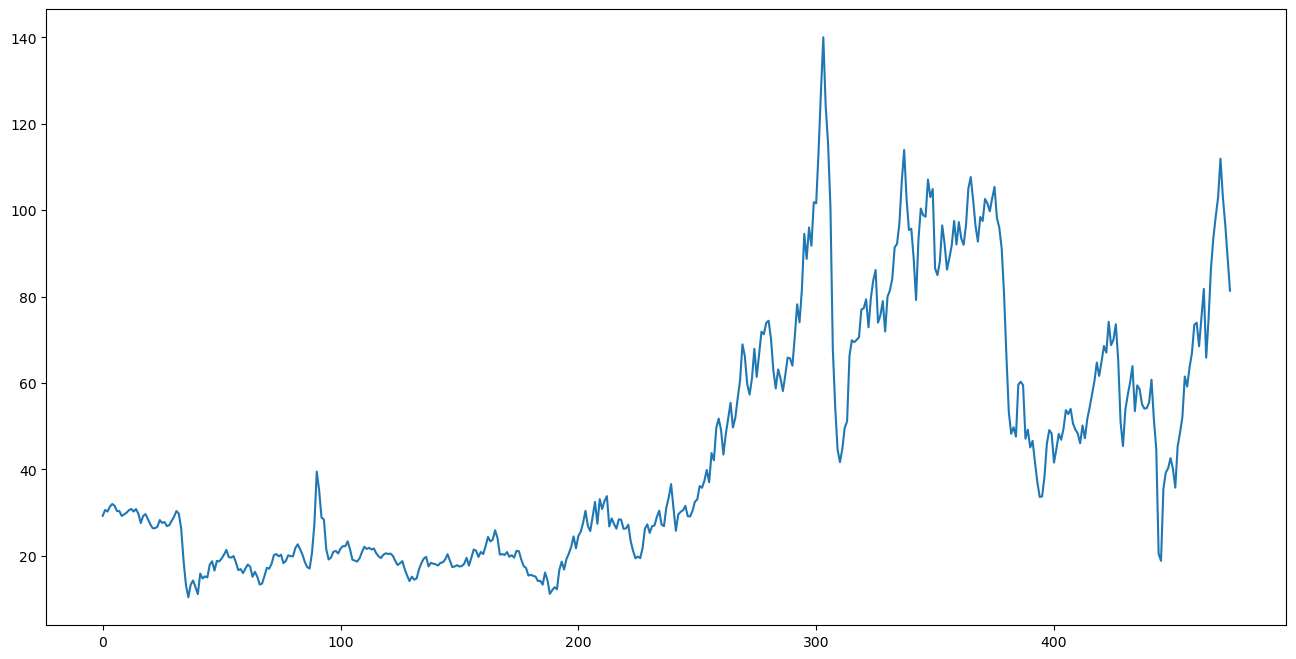

In [38]:
# Plotting
plt.figure(figsize=(16,8))
plt.plot(df["price"], label="Crude oil price");

In [39]:
# Format datetime
df['date'] = pd.to_datetime(df['date'])

In [40]:
df['date']

0     1983-03-30
1     1983-04-04
2     1983-05-02
3     1983-06-01
4     1983-07-01
         ...    
470   2022-05-02
471   2022-06-01
472   2022-07-01
473   2022-08-01
474   2022-09-01
Name: date, Length: 475, dtype: datetime64[ns]

In [41]:
# Prediction Present Price with Past Price
# Define our explanatory variables
# The variables we will be using at this stage, are the moving averages for the past three and nine days
df['MA3'] = df['price'].shift(1).rolling(window=3).mean()
df['MA9']= df['price'].shift(1).rolling(window=9).mean()

In [42]:
df.head(10)

,date,price,percentChange,change,MA3,MA9
0,1983-03-30,29.27,NaN,NaN,NaN,NaN
1,1983-04-04,30.63,4.646396,1.36,NaN,NaN
2,1983-05-02,30.25,-1.240614,-0.38,NaN,NaN
3,1983-06-01,31.38,3.735537,1.13,30.050000,NaN
4,1983-07-01,32.00,1.975781,0.62,30.753333,NaN
5,1983-08-01,31.59,-1.281250,-0.41,31.210000,NaN
6,1983-09-01,30.36,-3.893637,-1.23,31.656667,NaN
7,1983-10-03,30.37,0.032938,0.01,31.316667,NaN
8,1983-11-01,29.23,-3.753704,-1.14,30.773333,NaN
9,1983-12-01,29.60,1.265823,0.37,29.986667,30.564444


In [43]:
# Dropping the NaN values
df = df.dropna()

# Initialising X and assigning the two feature variables
X = df[['MA3','MA9']]
X.head()

,MA3,MA9
9,29.986667,30.564444
10,29.733333,30.601111
11,29.603333,30.528889
12,30.043333,30.562222
13,30.460000,30.503333


In [44]:
# Setting-up the dependent variable
y = df['price']
y.head()

9     29.60
10    29.98
11    30.55
12    30.85
13    30.26
Name: price, dtype: float64

In [45]:
len(df)

466

In [51]:
# Setting the training set to 70% of the data
training = 0.7
t = int(training*len(df))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [61]:
X_train,y_train

(           MA3        MA9
 9    29.986667  30.564444
 10   29.733333  30.601111
 11   29.603333  30.528889
 12   30.043333  30.562222
 13   30.460000  30.503333
 ..         ...        ...
 330  75.500000  78.032222
 331  76.946667  78.100000
 332  77.773333  79.048889
 333  81.836667  79.543333
 334  85.640000  80.390000
 
 [326 rows x 2 columns],
 9      29.60
 10     29.98
 11     30.55
 12     30.85
 13     30.26
        ...  
 330    79.97
 331    81.43
 332    84.11
 333    91.38
 334    92.19
 Name: price, Length: 326, dtype: float64)

In [63]:
X_test,y_test

(            MA3        MA9
 335   89.226667  81.061111
 336   93.513333  83.616667
 337   98.626667  87.071111
 338  105.873333  90.957778
 339  107.783333  94.377778
 ..          ...        ...
 470   98.320000  83.054444
 471  104.456667  87.877778
 472  105.983333  90.996667
 473  103.920000  92.660000
 474   96.293333  95.235556
 
 [140 rows x 2 columns],
 335     96.9700
 336    106.7200
 337    113.9300
 338    102.7000
 339     95.4200
          ...   
 470    111.9100
 471    103.1000
 472     96.7500
 473     89.0300
 474     81.3557
 Name: price, Length: 140, dtype: float64)

In [48]:
# Generate the coefficient and constant for the regression
model = LinearRegression().fit(X_train,y_train)

In [60]:
predicted_price = model.predict(X_test)
predicted_price

array([ 89.89313913,  94.4501874 ,  99.79737033, 107.5957943 ,
       109.12807918, 104.2585745 ,  96.66126334,  91.02241342,
        84.86637314,  83.8437455 ,  88.3555538 ,  96.35491641,
        98.83391706, 101.39681521, 102.87899932, 105.19814855,
        97.08359495,  89.76038923,  83.19861219,  87.24667827,
        90.28355607,  89.85663519,  87.29024724,  87.41483563,
        92.06864159,  93.18365281,  95.03778411,  93.30380787,
        93.38117581,  93.00864639,  97.15474318, 102.93682382,
       104.97685146, 101.5632089 ,  95.60847857,  94.02438458,
        94.3681078 ,  98.03625949,  99.17135784, 100.19466217,
       100.36225718, 101.79598365, 101.12807654,  98.36461868,
        92.88868557,  86.28755116,  75.3146746 ,  61.41595684,
        49.81808861,  44.583676  ,  43.73014349,  49.19570332,
        54.25329139,  59.7435645 ,  55.57856183,  51.57476373,
        46.05353531,  45.88276118,  43.07649692,  40.13080242,
        35.60303599,  33.10498705,  34.13476747,  39.05

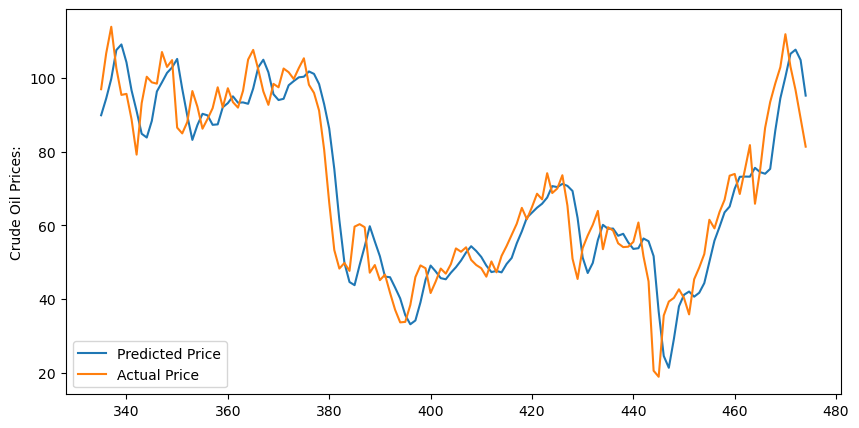

In [57]:
# Plotting our predicted price and actual price
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
df['predictedPrice'] = predicted_price
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices:")
plt.show()

In [59]:
predicted_price

,price
335,89.893139
336,94.450187
337,99.797370
338,107.595794
339,109.128079
...,...
470,100.308582
471,106.577938
472,107.718561
473,104.893228


In [ ]:
# Cleaning data
df = df.drop(columns='MA3', axis=1).copy()
df = df.drop(columns='MA9', axis=1).copy()
df = df.dropna()
df.head()

In [71]:
# Display only specific datetime
df_index = df.index
index = df['date'] == '2011-03-01'
result = df_index[index]
print(result)
print(df.loc[result.tolist()[0], ['date', 'price', 'predictedPrice']])

Int64Index([336], dtype='int64')
date              2011-03-01 00:00:00
price                          106.72
predictedPrice              94.450187
Name: 336, dtype: object


<h2>Predict Price with Linear Equation</h2>

In [72]:
# Read data set
df = pd.read_csv("crude-oil-price.csv")
df.head()

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62


In [74]:
# Format datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['date']

0     1983-03-30
1     1983-04-04
2     1983-05-02
3     1983-06-01
4     1983-07-01
         ...    
470   2022-05-02
471   2022-06-01
472   2022-07-01
473   2022-08-01
474   2022-09-01
Name: date, Length: 475, dtype: datetime64[ns]

Text(0, 0.5, 'price')

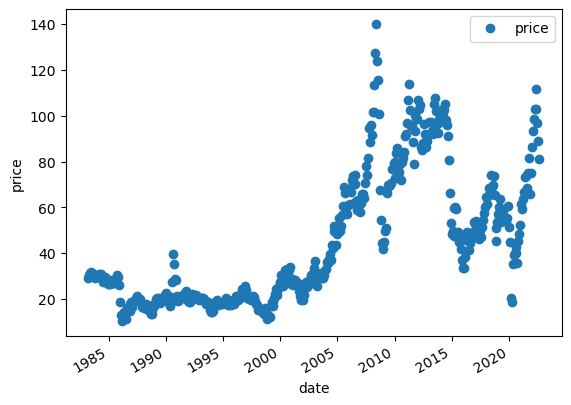

In [15]:
# Scatter plot of price
df.plot(x='date', y='price', style='o')
plt.ylabel('price')

In [77]:
# Preparing Data
X = df['date']
y = df['price'].values.reshape(-1, 1)
X,y

(0     1983-03-30
 1     1983-04-04
 2     1983-05-02
 3     1983-06-01
 4     1983-07-01
          ...    
 470   2022-05-02
 471   2022-06-01
 472   2022-07-01
 473   2022-08-01
 474   2022-09-01
 Name: date, Length: 475, dtype: datetime64[ns],
 array([[ 29.27  ],
        [ 30.63  ],
        [ 30.25  ],
        [ 31.38  ],
        [ 32.    ],
        [ 31.59  ],
        [ 30.36  ],
        [ 30.37  ],
        [ 29.23  ],
        [ 29.6   ],
        [ 29.98  ],
        [ 30.55  ],
        [ 30.85  ],
        [ 30.26  ],
        [ 30.83  ],
        [ 29.75  ],
        [ 27.6   ],
        [ 29.23  ],
        [ 29.66  ],
        [ 28.46  ],
        [ 27.31  ],
        [ 26.41  ],
        [ 26.41  ],
        [ 26.73  ],
        [ 28.29  ],
        [ 27.63  ],
        [ 27.84  ],
        [ 26.87  ],
        [ 27.12  ],
        [ 28.08  ],
        [ 29.08  ],
        [ 30.38  ],
        [ 29.75  ],
        [ 26.3   ],
        [ 18.83  ],
        [ 13.26  ],
        [ 10.42  ],
        [ 13.

In [78]:
# Training Model
model = LinearRegression().fit(X.values.reshape(-1,1),y)

In [79]:
# Prediction
predictions = model.predict(X.values.astype(float).reshape(-1, 1))

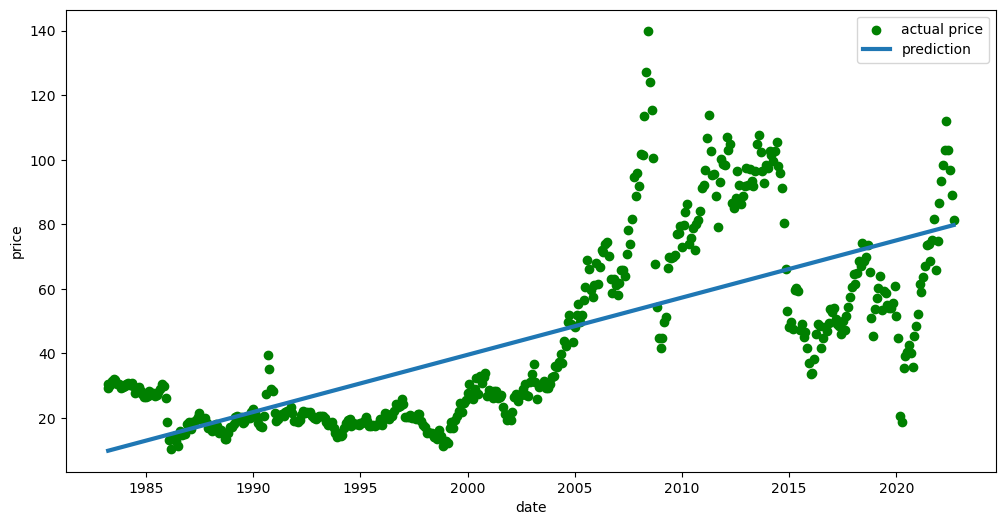

In [93]:
# Plotting
plt.figure(figsize=(12,6))
plt.scatter(X, y, label='actual price', color='green')
plt.plot(X, predictions, label='prediction', linewidth=3)
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.show()

### User Input


In [97]:
user_input = '2022-12-01'
input_format = pd.to_datetime(user_input, format='%Y-%m-%d')
user_pred = model.predict(pd.DataFrame([input_format]).values.astype(float).reshape(-1, 1))
print(user_pred[0,0])

80.19923859553471
